# Apple Stock Prediction using ANN

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import yfinance as yf

In [3]:
start= '2005-01-01'
end= '2025-12-15'
stock= 'AAPL'

df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.sample(5)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2006-07-06,1.680166,1.991786,2.050000,1.986071,2.038929,633208800
2007-08-08,4.037275,4.786071,4.887857,4.714286,4.884286,808096800
2014-03-18,16.656345,18.978571,18.998928,18.757143,18.782143,209647200
2008-03-17,3.817954,4.526071,4.592500,4.376786,4.376786,1072598800
2018-07-13,45.368378,47.832500,47.959999,47.724998,47.770000,50055600


In [5]:
df.head(5)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2005-01-03,0.953359,1.130179,1.162679,1.117857,1.156786,691992000
2005-01-04,0.963150,1.141786,1.169107,1.124464,1.139107,1096810400
2005-01-05,0.971586,1.151786,1.165179,1.143750,1.151071,680433600
2005-01-06,0.972339,1.152679,1.159107,1.130893,1.154821,705555200
2005-01-07,1.043136,1.236607,1.243393,1.156250,1.160714,2227450400


In [6]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-12-09,246.750000,246.750000,247.240005,241.750000,241.830002,44649200
2024-12-10,247.770004,247.770004,248.210007,245.339996,246.889999,36914800
2024-12-11,246.490005,246.490005,250.800003,246.259995,247.960007,45205800
2024-12-12,247.960007,247.960007,248.740005,245.679993,246.889999,32777500
2024-12-13,248.130005,248.130005,249.289993,246.240005,247.820007,33132000


In [7]:
df.size

30132

In [8]:
df.shape

(5022, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5022 entries, 2005-01-03 to 2024-12-13
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  5022 non-null   float64
 1   (Close, AAPL)      5022 non-null   float64
 2   (High, AAPL)       5022 non-null   float64
 3   (Low, AAPL)        5022 non-null   float64
 4   (Open, AAPL)       5022 non-null   float64
 5   (Volume, AAPL)     5022 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 274.6 KB


In [10]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,5022.000000,5022.000000,5022.000000,5022.000000,5022.000000,5.022000e+03
mean,51.050589,52.827052,53.346453,52.255580,52.787353,3.865934e+08
std,62.700070,62.726291,63.316369,62.060143,62.659134,3.960365e+08
min,0.953359,1.130179,1.159107,1.117857,1.139107,2.404830e+07
25%,6.078060,7.205357,7.276429,7.115535,7.210000,1.005603e+08
50%,22.300995,24.748750,25.012321,24.565000,24.711249,2.294026e+08
75%,63.965840,65.979376,66.508123,65.258127,65.861248,5.579525e+08
max,248.130005,248.130005,250.800003,246.259995,247.960007,3.372970e+09


In [11]:
df.dropna(inplace=True)

In [12]:
dfc = df.reset_index()['Close']

In [13]:
dfc.head()

Ticker,AAPL
0,1.130179
1,1.141786
2,1.151786
3,1.152679
4,1.236607


## Normalizing the Data

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dfc=scaler.fit_transform(np.array(dfc).reshape(-1,1))

## Train Test And Split

In [15]:
training_size=int(len(dfc)*0.65)
test_size=len(dfc)-training_size
train_data,test_data=dfc[0:training_size,:],dfc[training_size:len(dfc),:1]

In [16]:
training_size,test_size

(3264, 1758)

In [17]:
import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0] 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(3163, 100)
(3163,)


(None, None)

In [20]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Model Training and Evaluation

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

C:\Users\Shiva\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.0000e+00 - loss: 0.0015 - val_accuracy: 0.0000e+00 - val_loss: 0.0018
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.0000e+00 - loss: 1.6480e-05 - val_accuracy: 0.0000e+00 - val_loss: 0.0020
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.0000e+00 - loss: 1.2568e-05 - val_accuracy: 0.0000e+00 - val_loss: 0.0023
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.0000e+00 - loss: 1.2414e-05 - val_accuracy: 0.0000e+00 - val_loss: 0.0031
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.0000e+00 - loss: 1.3608e-05 - val_accuracy: 0.0000e+00 - val_loss: 0.0024
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.0000e+00 - loss: 1.2468e-05 - val_accuracy: 0.0000e+00 - val_loss: 0.0036
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.0000e+00 - loss: 1.1720e-05 - val_accuracy: 0.0000e+00 - val_loss: 0.0037
Epoch 8/50
50/50 ━━━━━━━━━━━━━━

In [25]:
import tensorflow as tf

In [26]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [27]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
import math
from sklearn.metrics import mean_squared_error
mse = math.sqrt(mean_squared_error(y_train,train_predict))
print("mse score is: ", mse)

mse score is:  18.536954285521926


In [29]:
math.sqrt(mean_squared_error(ytest,test_predict))

134.66527802153794

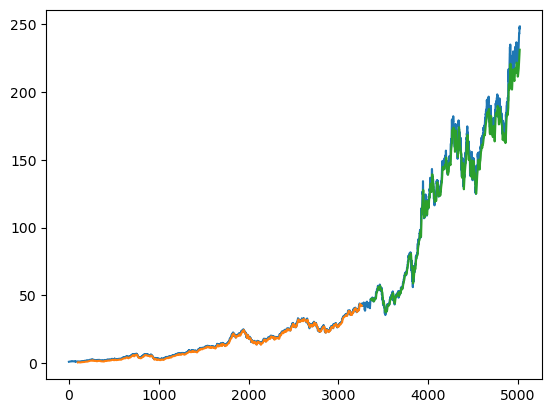

In [30]:
look_back=100
trainPredictPlot = numpy.empty_like(dfc)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(dfc)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(dfc)-1, :] = test_predict

plt.plot(scaler.inverse_transform(dfc))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()